
#<font color='red'>***Clustering***</font>


Notebook written by <font color='red'>***Pranav Chellagurki***.</font>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def distance(x,y,p):
  dist = np.sqrt( np.square(x-p[0]) + np.square(y-p[1]))
  return dist

def make_cluster_plot(x,y,p1,p2, find_updated_location=False):
  cluster_1_x=[]
  cluster_1_y=[]

  cluster_2_x=[]
  cluster_2_y=[]

  for x1, y1 in zip(x,y):
    dist1 = distance(x1,y1,p1)
    dist2 = distance(x1,y1,p2)

    if(dist2>dist1):
      cluster_1_x.append(x1)
      cluster_1_y.append(y1)
      continue

    cluster_2_x.append(x1)
    cluster_2_y.append(y1)
  
  plt.scatter(cluster_1_x, cluster_1_y, color='Orange')
  plt.scatter(cluster_2_x, cluster_2_y, color='Green')

  x=[20]
  y=[20]
  plt.scatter(x, y, color='White')

  if(find_updated_location):
    try:
      p1[0] = sum(cluster_1_x)/len(cluster_1_x)
      p1[1] = sum(cluster_1_y)/len(cluster_1_y)
    except:
      pass

    try:
      p2[0] = sum(cluster_2_x)/len(cluster_2_x)
      p2[1] = sum(cluster_2_y)/len(cluster_2_y)
    except:
      pass  

  plt.scatter(p1[0], p1[1], color='Blue')
  plt.scatter(p2[0], p2[1], color='Red')

  plt.xlabel('X')
  plt.ylabel('Y')
  plt.show()

  return p1, p2


#<font color='red'>***Clustering***</font>


Notebook written by <font color='red'>***Pranav Chellagurki***.</font>

#Contents:
- Brief introduction to unsupervised learning
- Why clustering?
- How does clustering work?
- K-MEANS clustering loss function
- practical scenarios
- K-Nearest Neighbours

#Brief introduction to unsupervised learning
Classical machine learning algorithms are by large divided into two categories.
- **Supervised**
- **Unsupervised**

Simply put, we use supervised learning algorithms when we ALREADY have the labels.
\
Example: House price prediction is a perfect example. We know the prices of the homes in the training set beforehand, and we tune the parameters to minimize the prediction delta. You can call linear regression and logistic regression as supervised learning algorithms
\
\
On the flip side, there are a lot of scenarios where we DO NOT have the labels. 
\
Example:
Imagine that you head the operations of a supermarket chain. One way of increasing footfall is to provide offers and discounts. It would greatly boost the sales if the discounts were customized to the spending habits of each customer. But, the super-market chain has lakhs of customers, and it is simply impossible to provide a separate offer to each customer. Rather, you can create 4 broad categories: 15%, 20%, 30%, 35% discount, and assign each customer to one of these 4 categories. The examples in your training set DO NOT have prior discount labels attached to them. How would you go about doing this? What if you had access to each customers annual income and their monthly expenditure?


The core working principle of any machine learning algorithm is to uncover the pattern behind a given chunk of data. Data to the human eye might look random and chaotic, but, even random events have some pattern to them. Clustering helps us to discern these patterns. 
\
\
It usually starts with a very bad performance and tunes itself to output a better performance. Think about the case of the super-market example. Do you think a pattern might exist? YES!
\
\
You can imagine that as a person's income increases, so does the bandwidth of expenditure. Using clustering algorithms, we can group them into four categories. They could consist of people with very little, modest, high, or very high expenditures.


---



#How does clustering work?
Let us take an example to better understand how clustering might work.
\
\
Imagine that you were the head of the city planning commission, and were tasked with finding a good location for the city post office. The city might consist of several hundred homes scattered throughout. Irrespective of the location of the post office, imagine that the postman will STILL be able to deliver the post to every single house, but, speed and time is the key. You want to pick the location strategically so that it minimizes the time it takes to deliver the post to each house. 
\
\
What does "You want to pick the location strategically so that it minimizes the time it takes to deliver the post to each house" mean? If the post office was located on one extreme of the city, and if all the homes were on the other extreme, it would drastically increase the time it takes to reach every single home. Hence, we need to minimize the distance between the homes and the post office. We cannot consider a just single home, but, rather the **AVERAGE** distance between the homes and the post office.
\
\
Let us assume that the city consists of just 5 homes.
\
\
The homes are marked in **Black** (You can imagine this to be the top down view of the CITY)

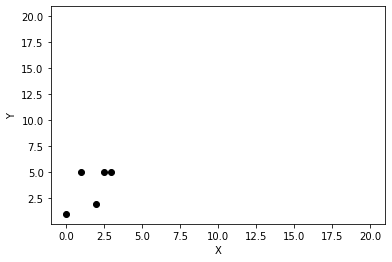

Now, what would happen if we select the following as the location for the post office? (**BLUE**)

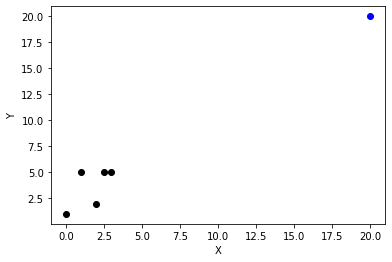

Would you consider this our optimal solution?
\
\
No. We can do much better.
\
\
What about this place:

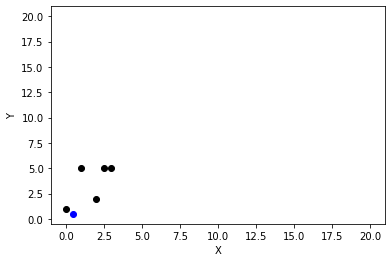

Although the new location for the post office is much better than the old one, would you say that we still have room for improvement?
\
\
The new location is almost next to the first home, but, what about the others? The majority of the homes are still at a disadvantage.
\
\
What about this location?:

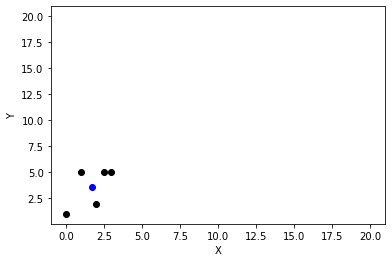

**NOTE**: **WE ARE TRYING TO MINIMISE THE AVERAGE DISTANCE**. The updated location might look further away from certain homes, but, this is the best solution for this problem. It reduces the AVERAGE distance between the homes and the post office to a minimum.
\
\
How did we get to this solution?
\
\
We calculated the averages of the five homes:

Updated_post_office_location = (Loc_of_house_1 + Loc_of_house_2 +Loc_of_house_3 + Loc_of_house_4 + Loc_of_house_5) / 5.
\
\
Adding the Xs and dividing by 5 will give you the updated_post_office X coordinate. Similarly, you can calculate the Y coordinate.



---

Now, let us expand our example to include 20 homes:

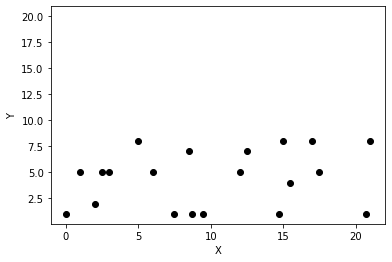

The city board recognizes the extreme workload of handling all the 20 houses by a single post office, hence, they ask you to build TWO post offices. How would you solve this problem?
\
\
The goal remains the same:
\
Reduce the AVERAGE distances between the homes and the NEAREST post office.
\
\
Why did we use the word nearest? 
\
\
Imagine how the post is usually delivered to you. The post office in YOUR AREA takes up the responsibility of managing the delivery of mails to your address.
\
\
The post office closest to your location is assigned as your primary post office.

POST_OFFICE_1 = **RED**
\
POST_OFFICE_2 = **BLUE**
\
\
HOMES_ASSIGNED_TO_POST_OFFICE_1 = **YELLOW**
\
HOMES_ASSIGNED_TO_POST_OFFICE_2 = **GREEN**

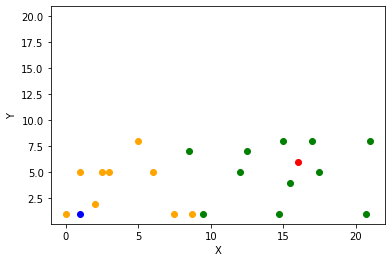

In [ ]:
p1,p2=make_cluster_plot(full_x, full_y, [1,1], [16,6], find_updated_location = False)

We see that all the homes were either assigned to the RED or BLUE post office based on which of the two is closer. Is this the optimum solution?
\
\
No! Okay, so we correctly assigned them to the nearest post office, but what about the location of the offices themselves? We see that the **BLUE** post office can do MUCH better. It is far away from most of the homes in its jurisdiction. What can be done here?
\
\
Let us go back to our example when we had only 5 homes. what did we do to achieve the optimum solution? Look above to recollect.
\
\
We calculated the average location of all the five homes. 
\
\
Let us do the same for our example here:
\
\
**VERY IMPORTANT NOTE**: we ONLY include the homes which are PRESENT in OUR CLUSTER. Example: For calculating the updated position of the RED post office, we only include the GREEN houses during our average calculation. Similarly, we ONLY consider the YELLOW houses to calculate the updated position of the BLUE post office.
\
\
The updated locations look like:

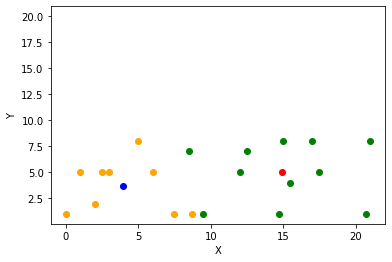

In [ ]:
p1,p2=make_cluster_plot(full_x, full_y, p1, p2, find_updated_location = True)

Is this our optimum solution? NO!
\
\
*Observation is the key!* 
- After updating your post office location, they can service the homes in its jurisdiction much quicker
- After updating the position, you can see that a couple of GREEN homes  are now CLOSER to the BLUE post office than to the RED post office. 


What do we do now?
\
\
Let us re-calculate the nearest post office for every home, and re-assign them. (**We use the updated value for the post offices**)

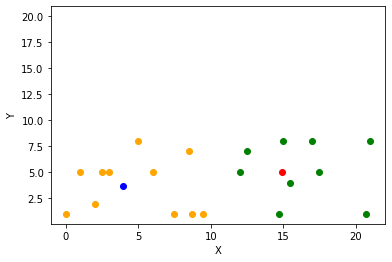

In [ ]:
p1,p2=make_cluster_plot(full_x, full_y, p1, p2, find_updated_location = False)


Observe the change in color of the homes that were closer to the BLUE post office than to the RED post office. Is this our optimum solution?
\
\
The shift in the homes would automatically lead to a change in the average position of that cluster. The RED and BLUE post office locations must also be updated to match the new clusters.
\
\
The updated locations look like:

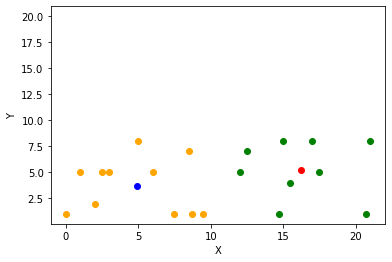

In [ ]:
p1,p2=make_cluster_plot(full_x, full_y, p1, p2, find_updated_location = True)

This looks to be our optimum solution. Let us re-calculate the distances and see if there is any re-assigment of homes.

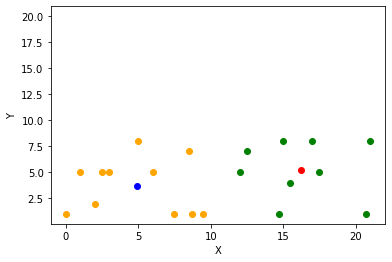

In [ ]:
p1,p2=make_cluster_plot(full_x, full_y, p1, p2, find_updated_location = False)


There is no change in the cluster. So, we can conclude that this is our best solution. (CALL THIS **CASE 1**)
\
\
Terms:
\
\
The black points in our examples (Homes) are called **cluster points**.
\
The post offices in our examples are called **cluster centroids**.
\
The cluster points(homes) that a cluster centroid(post office) covers come under its cluster(jurisdiction)
\
\
Let us summarise what we did:
- We randomly chose two cluster centroid locations (corresponding to the locations of the two Post Offices in our example)
- We then calculate the distance between each data point and each cluster centroid and assign it to the closest cluster. (equal to assigning homes to the closest post office in our example)
- We then calculate the updated positions of the cluster centroids by taking the average of all the points WITHIN ITS CLUSTER.
- We then re-calculate the distances between each point and the updated values of the cluster centroids and re-assign them if needed.
- We iteratively loop through these steps till we approach the optimum solution - When the cluster centroids are static and do not change with future iterations!

What we just described above is exactly HOW **K-MEANS CLUSTERING WORKS!!**

# K-MEANS Clustering LOSS FUNCTION
\
\
In the previous example, we started by choosing the initial post office locations randomly.
\
\
We know that the KMEANS clustering algorithm tunes our cluster centroids to provide the best solution, but, is it dependent on the initial location? Let us take another example to cement our doubts.
\
\
The BLUE and RED points represent our TWO Post offices.

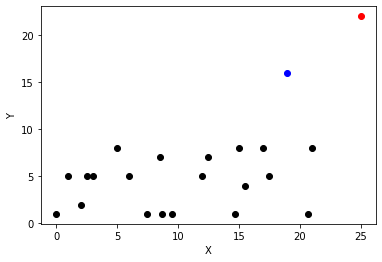

Let us calculate the distances and assign the points to either RED or BLUE cluster centroids

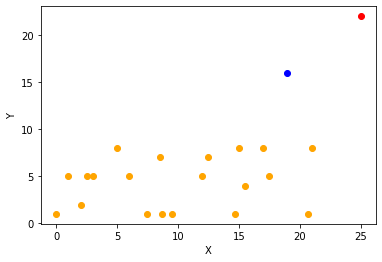

In [ ]:
p1,p2=make_cluster_plot(full_x, full_y, p1, p2, find_updated_location = False)


We see that **EVERY SINGLE HOME IS CLOSER TO THE BLUE POINT THAN TO THE RED POINT**
\
\
Now, let us try to calculate the updated cluster centroids:

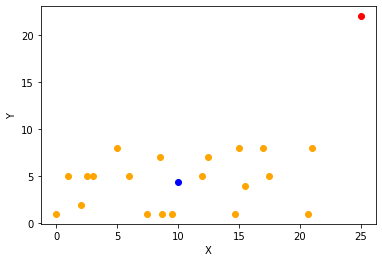

In [ ]:
p1,p2=make_cluster_plot(full_x, full_y, p1, p2, find_updated_location = True)


Let us try to re-calculate the distances and re-assign the points to the closest updated cluster centroids

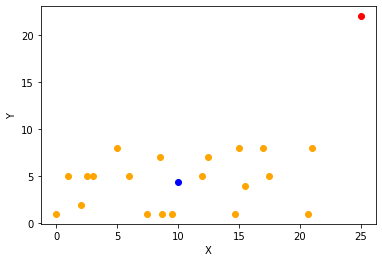

In [ ]:
p1,p2=make_cluster_plot(full_x, full_y, p1, p2, find_updated_location = False)


We see that nothing changes. We have arrived at our OPTIMUM solution(CALL THIS **CASE 2**). But, does this make sense? We see that the presence of the RED Post Office makes absolutely no difference, as it covers ZERO homes. At this point, we might as well completely drop RED Post Office. 
\
\
**We see that our final solution is influenced by the initial locations we pick.**
\
\
We need a method to compare different approaches(On the same data). 

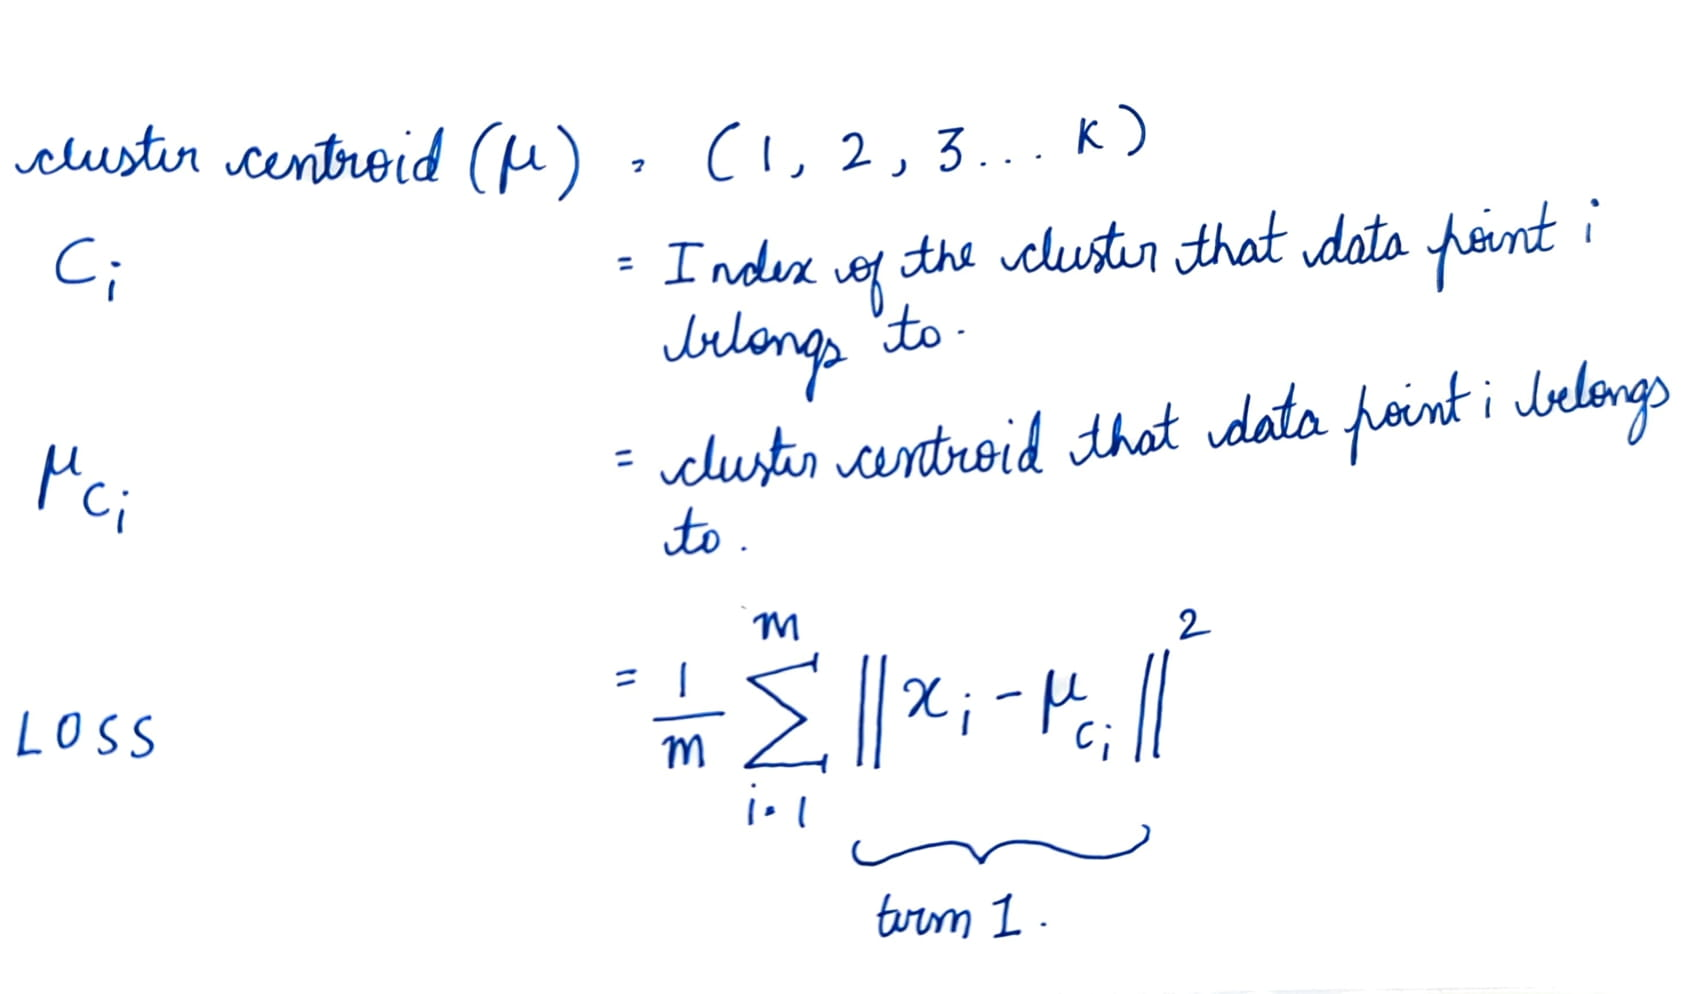

**Let us demystify the above LOSS function:**
\
\
The cluster centroids are nothing but the location of the TWO Post Offices in our example. So, for our cluster, the Cluster centroids will be : { 1,2 }
\
\
**C(i)** tells us which cluster a particular data point is attached. In our example, all yellow points will return a value 1, and all green points will return a value 2 for C(i).
\
\
The term **μ C(i)** tells us the location of the cluster centroid to which data point i is attached.
\
\
**m** = the number of data points (homes in our example)
\
\
**The loss function provides the average squared distance between the data points and their cluster centroids.**


The loss function will return a smaller value for CASE 1 than for CASE 2. (Visualize what the formula is trying to represent)
\
\
Hence, we can choose to go ahead with CASE 1.
\
\
**In practice, you cycle through a couple of hundred random initializations and calculate the loss for each set. Finally, you choose the set which produces the MINIMUM value for the LOSS function.**

#Practical scenarios:
In most cases, we already know the number of clusters that the data needs to be divided into. Like the examples we showcased above.
\
\
But, there are also certain scenarios where the number of clusters is not known. 
\
\
Example: Imagine that the city board does not limit you to the number of Post offices you can construct. Can you rely on KMEANS Clustering to also provide the right value for the number of clusters?
\
\
Well, there isn't a general consensus regarding how we can choose the perfect value for the number of clusters K, but, one method that tends to be used is called the elbow method:

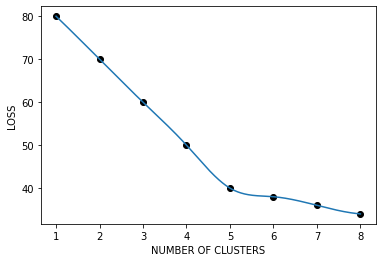

The X-axis represents the number of CLUSTERS and the Y-AXIS represents the MINIMUM POSSIBLE LOSS  for the corresponding number of clusters (Optimum solution)
\
\
We see that as we increase the number of clusters, the LOSS keeps decreasing. This makes sense. Imagine that we increased the number of post offices. The average distance between each house and the nearest post office would keep decreasing.
\
\
When the number of post offices is EQUAL to the number of homes, the average distance would be ~ 0. You can imagine a Post Office to be constructed next to every home. But, does it make sense to go about this approach? Instead, Machine Learning Engineers employ what is called the ELBOW method. In the above graph, if you can imagine the line to be a hand, then the point 5 looks like the elbow. 
\
\
You can interpret it this way: **The rate of decrease in LOSS reduces beyond the elbow point. It takes away the incentive of increasing the number of clusters**, hence, we should proceed with 5 clusters.